## <b> ■ 복습 </b>
    1장. Numpy
    2장. 퍼셉트론
    3장. 신경망 (저자가 만든 가중치로 3층 신경망 구현)
    4장. 신경망 구현 (직접 학습시켜 2층 신경망 구현 - 수치미분)
        수치미분으로 신경망을 학습 시키기에는 너무 시간이 많이 걸린다
    5장. 신경망 구현 (직접 학습시켜 2층 신경망 구현 - 오차역전파)
        신경망의 함수들의 도함수를 만들어서 역전파 함수로 구현하고 오차를 역전파해서 마지막에는 가중치 행렬(W1, W2)를 변경하게끔 구현
         
                 Affine1(W1)+b1                Affine2(W2)+b2
        입력층 ------------------> 시그모이드 ------------------> 시그모이드 ------------------> 소프트맥스 ------------------> 교차 엔트로피
                                       ↓                           ↓                            ↓                              ↓
                                     도함수                        도함수                        도함수                           도함수
                     <----------------------------------------------------------------------------------------------------------------------- 비용(역전파)

    면접문제: 수치미분과 오차역전파의 차이가 무엇인가?
        답: 
        
### <b>■ 신경망안에 들어가는 함수를 클래스로 구성</b>
    클래스 구성>                    
    1. ReLU 함수 클래스               모든 클래스별로
    2. Sigmoid 함수                   순전파 / 역전파    
    3. Affine 계층                      함수를 구현
    4. Softmax 함수
    5. Cross Entropy
    
### <b>■ Softmax 함수 클래스 구현 및 Cross Entropy 함수 클래스 구현 (Softmax with Loss) </b>
    1. 소프트맥스 함수 식
    2. 소프트맥스 함수 계산그래프
    3. 교차 엔트로피 함수 식
    4. 교차 엔트로피 함수 계산 그래프
    5. 소프트맥스 + 교차 엔트로피 묶어서 코드 구현
![soft-cross1](http://cfile271.uf.daum.net/image/999678455F3074570A379A)
![soft-cross2](http://cfile296.uf.daum.net/image/998D43455F3073720A1C81)
![soft-cross3](http://cfile287.uf.daum.net/image/9908BD4A5F30748F0BFDBE)

### ※ 문제81. 책 179페이지의 SoftmaxWithLoss 클래스를 생성하고 구현하시오

In [2]:
from common.functions import *

class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.y = None
        self.x = None
        
    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        
        return self.loss
    
    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        dx = (self.y - self.t) / batch_size
        
        return dx

t = np.array([0,0,1,0,0,0,0,0,0,0])  # 숫자 2

x1 = np.array([0.01,0.01,0.01,0.01,0.01,0.01,0.04,0.3,0.1,0.5])
x2 = np.array([0.01,0.01,0.9,0.01,0.01,0.01,0.01,0.01,0.01,0.02])

soft = SoftmaxWithLoss()

print (soft.forward(x1,t))
print (soft.backward()) 

print (soft.forward(x2,t))
print (soft.backward() )

2.4063467509023186
[ 0.00901439  0.00901439 -0.09098561  0.00901439  0.00901439  0.00901439
  0.00928892  0.01204708  0.00986332  0.01471434]
1.5475681948007376
[ 0.0087373   0.0087373  -0.07872354  0.0087373   0.0087373   0.0087373
  0.0087373   0.0087373   0.0087373   0.00882511]


### <b>■ orderdict의 이해</b>
    OrderedDict는 일반 Dictionary와 다르게 입력된 데이터 뿐만 아니라 입력된 순서까지 같아야 동일한 것으로 판단

In [6]:
# 예제:  일반 딕셔너리 예제
print (' dict : ')

d1 = {}
d1['a'] = 'A'
d1['b'] = 'B'
d1['c'] = 'C'
d1['d'] = 'D'
d1['e'] = 'E'

d2 = {}
d2['e'] = 'E'
d2['d'] = 'D'
d2['c'] = 'C'
d2['b'] = 'B' 
d2['a'] = 'A'

print (d1) # {'a': 'A', 'b': 'B', 'c': 'C', 'd': 'D', 'e': 'E'}
print (d2) # {'e': 'E', 'd': 'D', 'c': 'C', 'b': 'B', 'a': 'A'}

print ( d1 == d2 )  # True  

# OrderDict() 를 테스트 
from collections import OrderedDict

print('\n')
print ('OrderDict : ')

d1 = collections.OrderedDict()
d1['a'] = 'A'
d1['b'] = 'B'
d1['c'] = 'C'
d1['d'] = 'D'
d1['e'] = 'E'

d2 = collections.OrderedDict()
d2['e'] = 'E'
d2['d'] = 'D'
d2['c'] = 'C'
d2['b'] = 'B' 
d2['a'] = 'A'

print (d1)
print (d2) 

OrderedDict([('a', 'A'), ('b', 'B'), ('c', 'C'), ('d', 'D'), ('e', 'E')])
OrderedDict([('e', 'E'), ('d', 'D'), ('c', 'C'), ('b', 'B'), ('a', 'A')])

print (d1 == d2)  # False 

 dict : 
{'a': 'A', 'b': 'B', 'c': 'C', 'd': 'D', 'e': 'E'}
{'e': 'E', 'd': 'D', 'c': 'C', 'b': 'B', 'a': 'A'}
True


OrderDict : 
OrderedDict([('a', 'A'), ('b', 'B'), ('c', 'C'), ('d', 'D'), ('e', 'E')])
OrderedDict([('e', 'E'), ('d', 'D'), ('c', 'C'), ('b', 'B'), ('a', 'A')])
False


    OrderDictionary는 순서까지 같아야 같은 데이터로 인식
    
    신경망에서는 순서가 아주 중요
        순전파로 갔던 길 그대로 역전파가 되어야하기 때문
    
    순전파 : 입력값 --> Affine1 --> ReLU --> Affine2 --> ReLU --> Affine3 --> Lastlayer(SoftmaxWithLoss) --> 오차
    역전파 : 오차(1) --> LastLayer --> Affine3 --> ReLU --> Affine2 --> ReLU --> Affine1
    
    ※ 순전파의 순서를 반대로(reverse)해서 역전파 될 수 있도록 OrderedDict 함수를 신경망 코드에 사용해야한다

train acc, test acc | 0.114, 0.1063
train acc, test acc | 0.9039666666666667, 0.9035
train acc, test acc | 0.9252, 0.9265
train acc, test acc | 0.9353833333333333, 0.935
train acc, test acc | 0.94615, 0.9441
train acc, test acc | 0.9521666666666667, 0.9479
train acc, test acc | 0.9570166666666666, 0.9518
train acc, test acc | 0.9608833333333333, 0.9572
train acc, test acc | 0.9652833333333334, 0.9601
train acc, test acc | 0.9674666666666667, 0.9625
train acc, test acc | 0.9703, 0.9655
train acc, test acc | 0.97315, 0.9682
train acc, test acc | 0.97365, 0.9667
train acc, test acc | 0.9748666666666667, 0.9689
train acc, test acc | 0.9766666666666667, 0.9711
train acc, test acc | 0.9784666666666667, 0.9711
train acc, test acc | 0.9775666666666667, 0.9701


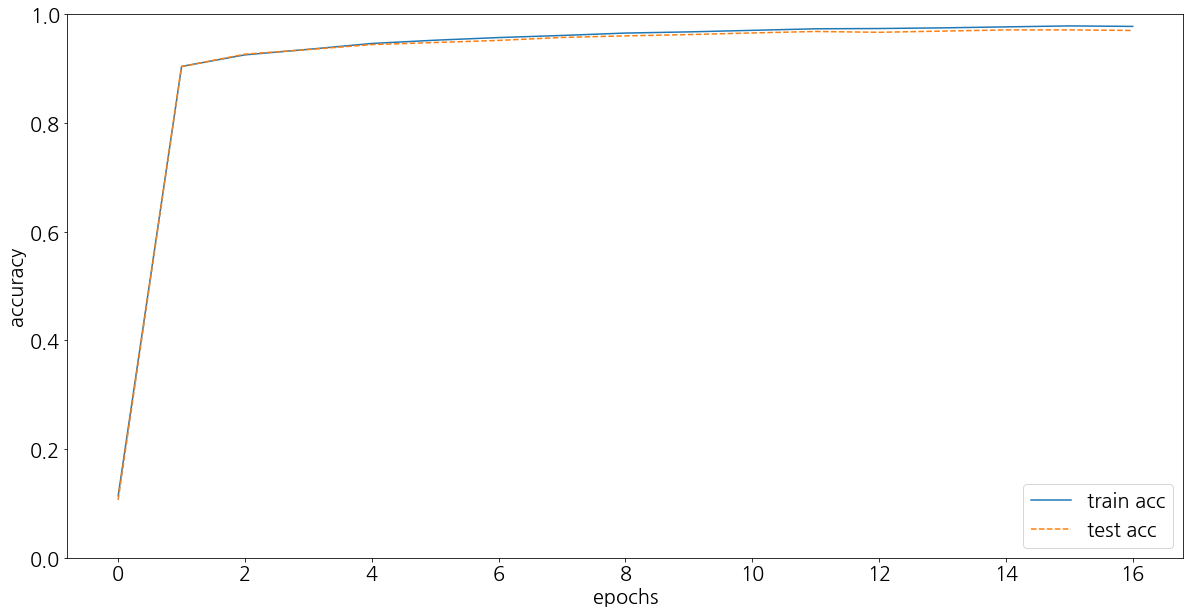

In [10]:
# 예제1. 오차역전파를 이용한 2층 신경망 전체코드를 구현하시오
# coding: utf-8
import sys, os

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist

plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams.update({'font.size':20})

class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
        self.lastLayer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1: t = np.argmax(t, axis=1)
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # x : 입력 데이터, t : 정답 레이블

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

    def gradient(self, x, t):
        # forward
        self.loss(x, t)
        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        layers = list(self.layers.values())
        layers.reverse()

        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db
        return grads

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터

iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0] # 60000 개
batch_size = 100  # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num): # 10000
    # 미니배치 획득  # 랜덤으로 100개씩 뽑아서 10000번을 수행하니까 백만번
    batch_mask = np.random.choice(train_size, batch_size) # 100개 씩 뽑아서 10000번 백만번
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss) # cost 가 점점 줄어드는것을 보려고

    # 1에폭당 정확도 계산 # 여기는 훈련이 아니라 1에폭 되었을때 정확도만 체크
    if i % iter_per_epoch == 0: # 600 번마다 정확도 쌓는다.

        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc) # 10000/600 개  16개 # 정확도가 점점 올라감
        test_acc_list.append(test_acc)  # 10000/600 개 16개 # 정확도가 점점 올라감
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

    2층 신경망의 큰 그림
        1. TwoLayerNet 클래스
            - 초기화 함수 : 가중치와 바이어스 초기값 세팅
            - predict 함수
            - loss 함수 : predict를 호출해서 예측값을 뽑아내고 예측값과 target값을 lastlayer의 forward함수에 넣어서 오차를 출력
            - accuracy 함수 : 신경망의 성능을 확인하기 위해서 정확도 체크를 위한 함수
            - gradient 함수 : 오차함수를 실행하는 함수. 역전파를 진행하는 코드(가중치 갱신)
            
        2. 클래스를 객체화 시켜서 신경망 구현하는 코드
```python
            network = TwoLayerNet(input_size = 50, hidden_size = 50, output_size = 10) # 2층 신경망
    
            for i in range(len(x)/batch_size): # len(x)/batch_size : epoch 크기
                grad = network.gradient(x, t)
                for key in ('W1','b1','W2','b2'):
                    network.params[key] -= lr*grad[key]
```        
            구현 결과를 시각화 하는 코드
                훈련 데이터의 정확도와 테스트 데이터의 정확도를 비교해서 시각화하여 오버피팅이 생기는지 확인
                

### ※ 문제82. 위의 2층 신경망의 활성화 함수를 시그모이드가 아닌 현업에서 많이 쓰는 ReLU로 변경하고 정확도를 보시오
    시그모이드 -> ReLU
    ReLU -> 시그모이드

train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.7853666666666667, 0.787
train acc, test acc | 0.8766833333333334, 0.8812
train acc, test acc | 0.8985, 0.9005
train acc, test acc | 0.9068666666666667, 0.9091
train acc, test acc | 0.9137666666666666, 0.916
train acc, test acc | 0.9200166666666667, 0.9209
train acc, test acc | 0.9233166666666667, 0.9239
train acc, test acc | 0.9262166666666667, 0.9284
train acc, test acc | 0.9298333333333333, 0.9318
train acc, test acc | 0.93345, 0.9334
train acc, test acc | 0.93605, 0.9347
train acc, test acc | 0.93855, 0.9372
train acc, test acc | 0.9409333333333333, 0.94
train acc, test acc | 0.94255, 0.9419
train acc, test acc | 0.9445666666666667, 0.9436
train acc, test acc | 0.9465, 0.9452


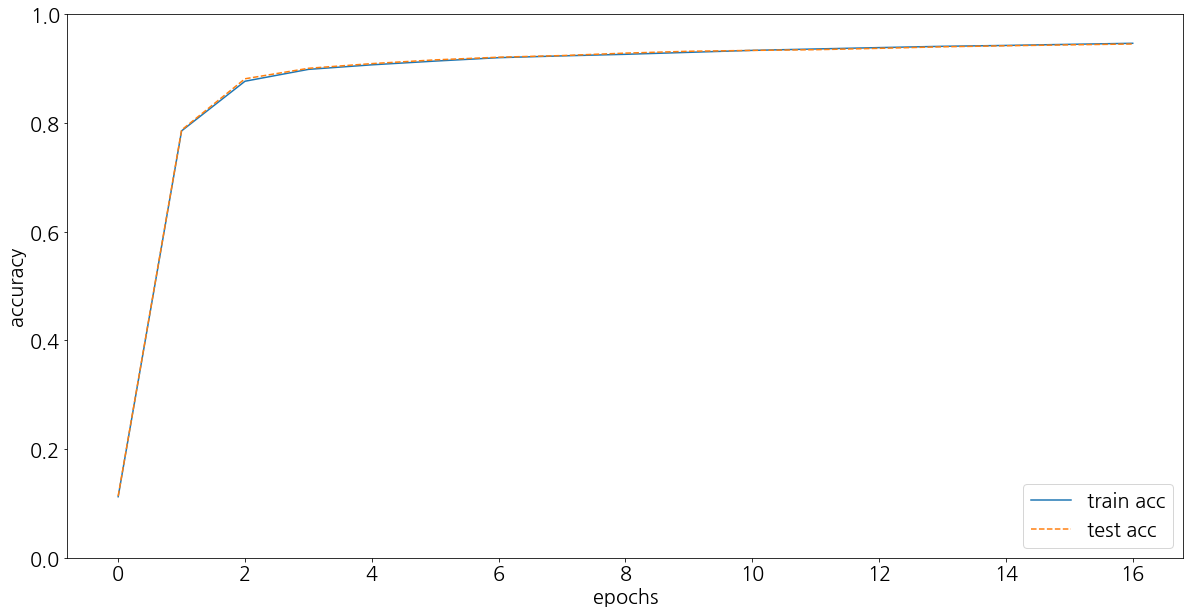

In [11]:
# 시그모이드
# coding: utf-8
import sys, os

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist

plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams.update({'font.size':20})

class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Sigmoid()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
        self.lastLayer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1: t = np.argmax(t, axis=1)
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # x : 입력 데이터, t : 정답 레이블

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

    def gradient(self, x, t):
        # forward
        self.loss(x, t)
        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        layers = list(self.layers.values())
        layers.reverse()

        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db
        return grads

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터

iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0] # 60000 개
batch_size = 100  # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num): # 10000
    # 미니배치 획득  # 랜덤으로 100개씩 뽑아서 10000번을 수행하니까 백만번
    batch_mask = np.random.choice(train_size, batch_size) # 100개 씩 뽑아서 10000번 백만번
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss) # cost 가 점점 줄어드는것을 보려고

    # 1에폭당 정확도 계산 # 여기는 훈련이 아니라 1에폭 되었을때 정확도만 체크
    if i % iter_per_epoch == 0: # 600 번마다 정확도 쌓는다.

        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc) # 10000/600 개  16개 # 정확도가 점점 올라감
        test_acc_list.append(test_acc)  # 10000/600 개 16개 # 정확도가 점점 올라감
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

train acc, test acc | 0.114, 0.1063
train acc, test acc | 0.9039666666666667, 0.9035
train acc, test acc | 0.9252, 0.9265
train acc, test acc | 0.9353833333333333, 0.935
train acc, test acc | 0.94615, 0.9441
train acc, test acc | 0.9521666666666667, 0.9479
train acc, test acc | 0.9570166666666666, 0.9518
train acc, test acc | 0.9608833333333333, 0.9572
train acc, test acc | 0.9652833333333334, 0.9601
train acc, test acc | 0.9674666666666667, 0.9625
train acc, test acc | 0.9703, 0.9655
train acc, test acc | 0.97315, 0.9682
train acc, test acc | 0.97365, 0.9667
train acc, test acc | 0.9748666666666667, 0.9689
train acc, test acc | 0.9766666666666667, 0.9711
train acc, test acc | 0.9784666666666667, 0.9711
train acc, test acc | 0.9775666666666667, 0.9701


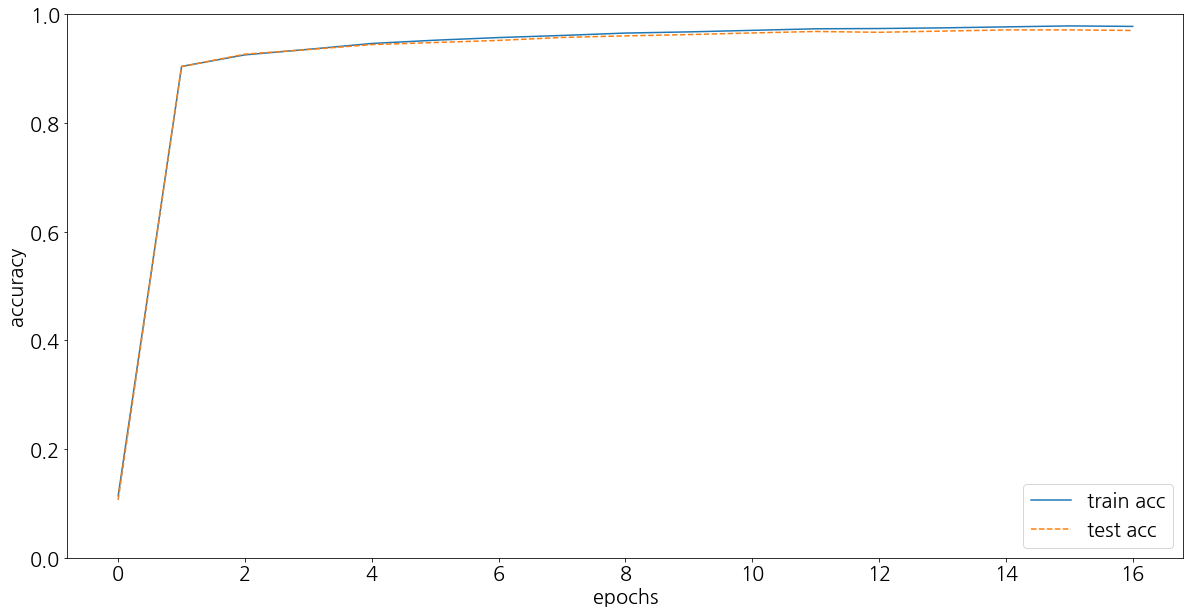

In [10]:
# ReLU
# coding: utf-8
import sys, os

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist

plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams.update({'font.size':20})

class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
        self.lastLayer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1: t = np.argmax(t, axis=1)
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # x : 입력 데이터, t : 정답 레이블

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

    def gradient(self, x, t):
        # forward
        self.loss(x, t)
        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        layers = list(self.layers.values())
        layers.reverse()

        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db
        return grads

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터

iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0] # 60000 개
batch_size = 100  # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num): # 10000
    # 미니배치 획득  # 랜덤으로 100개씩 뽑아서 10000번을 수행하니까 백만번
    batch_mask = np.random.choice(train_size, batch_size) # 100개 씩 뽑아서 10000번 백만번
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss) # cost 가 점점 줄어드는것을 보려고

    # 1에폭당 정확도 계산 # 여기는 훈련이 아니라 1에폭 되었을때 정확도만 체크
    if i % iter_per_epoch == 0: # 600 번마다 정확도 쌓는다.

        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc) # 10000/600 개  16개 # 정확도가 점점 올라감
        test_acc_list.append(test_acc)  # 10000/600 개 16개 # 정확도가 점점 올라감
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### ※ 문제83. 신경망의 성능을 확인하는 마지막 시각화 그래프가 정확도가 아니라 loss(오차)로 출력되게 하시오

train acc, test acc | 0.09376666666666666, 0.0957, 2.3025704797934696
train acc, test acc | 0.9070166666666667, 0.9103, 0.3204938057746957
train acc, test acc | 0.92505, 0.9262, 0.25982388187100086
train acc, test acc | 0.93755, 0.9379, 0.21625226566554426
train acc, test acc | 0.9443333333333334, 0.9441, 0.19952511676762327
train acc, test acc | 0.9507833333333333, 0.951, 0.1719925717726898
train acc, test acc | 0.9545, 0.9532, 0.15872904611221178
train acc, test acc | 0.9603666666666667, 0.9582, 0.14287426139566875
train acc, test acc | 0.964, 0.9616, 0.13353369298000972
train acc, test acc | 0.9660666666666666, 0.9614, 0.12816550414873462
train acc, test acc | 0.9698166666666667, 0.965, 0.12149858534303175
train acc, test acc | 0.9707166666666667, 0.9669, 0.11385447615570149
train acc, test acc | 0.97255, 0.9694, 0.11129534290815066
train acc, test acc | 0.9746666666666667, 0.9688, 0.10579151954324291
train acc, test acc | 0.9764833333333334, 0.9704, 0.10394391976139118
train acc, t

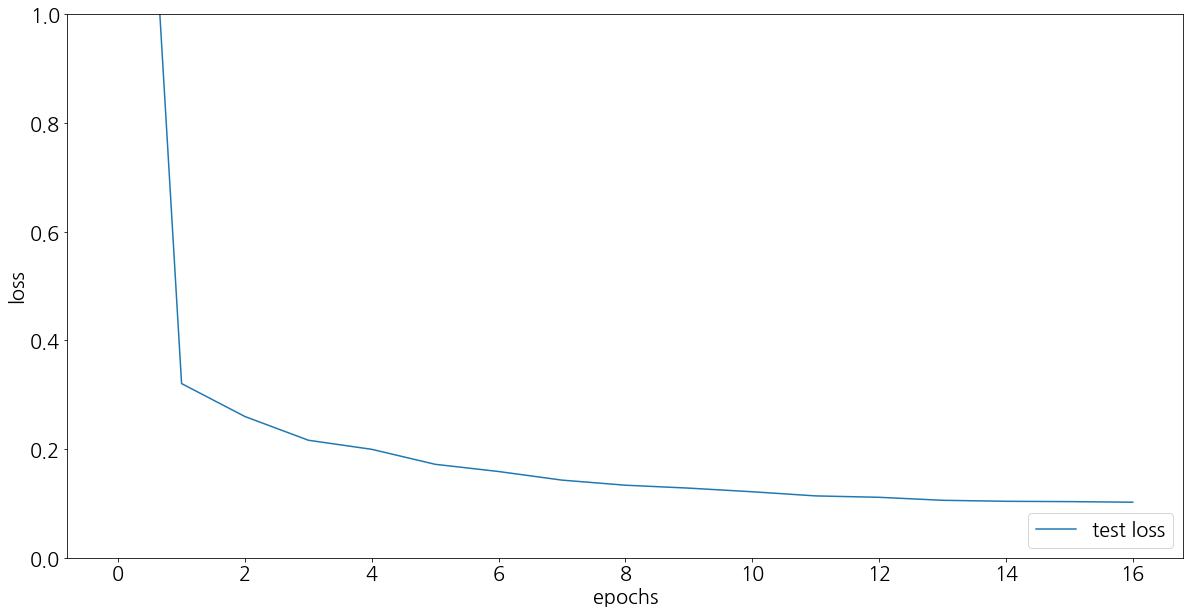

In [13]:
# coding: utf-8
import sys, os

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist

plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams.update({'font.size':20})

class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
        self.lastLayer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1: t = np.argmax(t, axis=1)
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # x : 입력 데이터, t : 정답 레이블

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

    def gradient(self, x, t):
        # forward
        self.loss(x, t)
        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        layers = list(self.layers.values())
        layers.reverse()

        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db
        return grads

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터

iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0] # 60000 개
batch_size = 100  # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []
test_loss_list = []
# 1에폭당 반복 수

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num): # 10000
    # 미니배치 획득  # 랜덤으로 100개씩 뽑아서 10000번을 수행하니까 백만번
    batch_mask = np.random.choice(train_size, batch_size) # 100개 씩 뽑아서 10000번 백만번
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss) # cost 가 점점 줄어드는것을 보려고

    # 1에폭당 정확도 계산 # 여기는 훈련이 아니라 1에폭 되었을때 정확도만 체크
    if i % iter_per_epoch == 0: # 600 번마다 정확도 쌓는다.

        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc) # 10000/600 개  16개 # 정확도가 점점 올라감
        test_acc_list.append(test_acc)  # 10000/600 개 16개 # 정확도가 점점 올라감
        test_loss = network.loss(x_test, t_test)
        test_loss_list.append(test_loss)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc) + ", "+ str(test_loss))

# 그래프 그리기
markers = {'loss': 'o'}
x = np.arange(len(train_acc_list))
plt.plot(x, test_loss_list, label='test loss')
# plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### ※ 문제84. (점심시간 문제) 위의 신경망을 2층이 아니라 3층으로 변경하시오
    은닉층의 노드수는 편하게 정하시오

train acc, test acc | 0.10235, 0.102
train acc, test acc | 0.7718166666666667, 0.7798
train acc, test acc | 0.8960666666666667, 0.899
train acc, test acc | 0.925, 0.9225
train acc, test acc | 0.9452833333333334, 0.9453
train acc, test acc | 0.95385, 0.9489
train acc, test acc | 0.9606166666666667, 0.9544
train acc, test acc | 0.9683166666666667, 0.9601
train acc, test acc | 0.9700833333333333, 0.962
train acc, test acc | 0.97445, 0.9644
train acc, test acc | 0.9707, 0.9613
train acc, test acc | 0.9795833333333334, 0.969
train acc, test acc | 0.9788666666666667, 0.9679
train acc, test acc | 0.9816666666666667, 0.9686
train acc, test acc | 0.98445, 0.9722
train acc, test acc | 0.9854166666666667, 0.9692
train acc, test acc | 0.9844333333333334, 0.9691


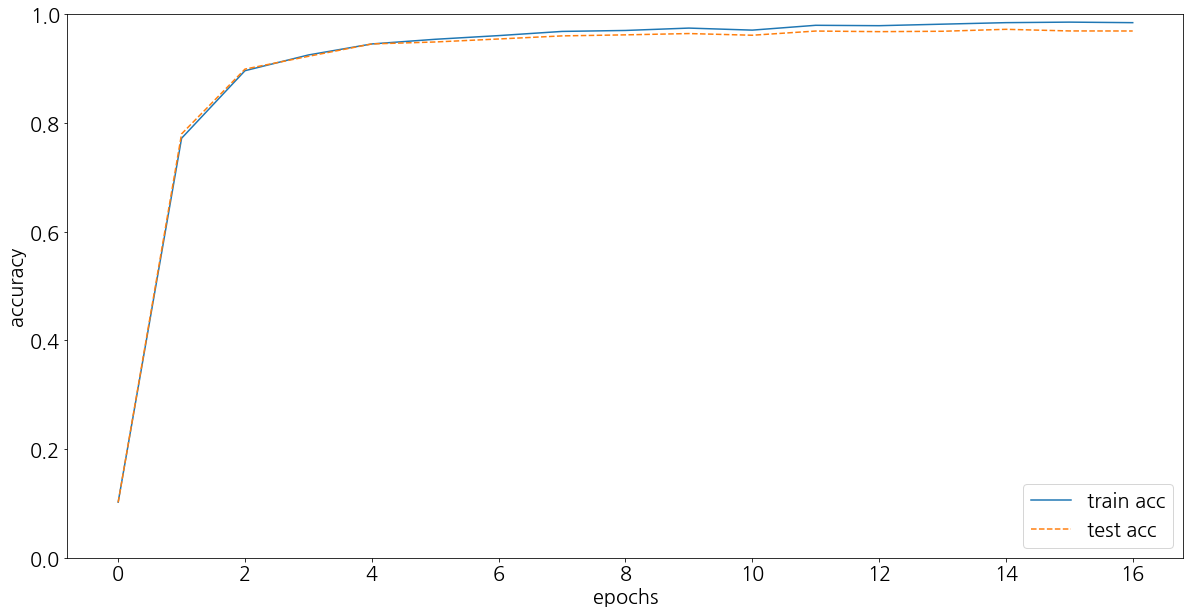

In [16]:
# ReLU
# coding: utf-8
import sys, os

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist

plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams.update({'font.size': 20})

class TwoLayerNet:

    def __init__(self, input_size, hidden_size1, hidden_size2, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size1)
        self.params['b1'] = np.zeros(hidden_size1)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size1, hidden_size2)
        self.params['b2'] = np.zeros(hidden_size2)
        self.params['W3'] = weight_init_std * np.random.randn(hidden_size2, output_size)
        self.params['b3'] = np.zeros(output_size)

        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine3'] = Affine(self.params['W3'], self.params['b3'])
        self.lastLayer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1: t = np.argmax(t, axis=1)
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # x : 입력 데이터, t : 정답 레이블

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        grads['W3'] = numerical_gradient(loss_W, self.params['W3'])
        grads['b3'] = numerical_gradient(loss_W, self.params['b3'])

        return grads

    def gradient(self, x, t):
        # forward
        self.loss(x, t)
        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        layers = list(self.layers.values())
        layers.reverse()

        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db
        grads['W3'], grads['b3'] = self.layers['Affine3'].dW, self.layers['Affine3'].db
        return grads

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
network = TwoLayerNet(input_size=784, hidden_size1=50, hidden_size2=100, output_size=10)

# 하이퍼파라미터

iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0] # 60000 개
batch_size = 100  # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num): # 10000
    # 미니배치 획득  # 랜덤으로 100개씩 뽑아서 10000번을 수행하니까 백만번
    batch_mask = np.random.choice(train_size, batch_size) # 100개 씩 뽑아서 10000번 백만번
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2', 'W3', 'b3'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss) # cost 가 점점 줄어드는것을 보려고

    # 1에폭당 정확도 계산 # 여기는 훈련이 아니라 1에폭 되었을때 정확도만 체크
    if i % iter_per_epoch == 0: # 600 번마다 정확도 쌓는다.

        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc) # 10000/600 개  16개 # 정확도가 점점 올라감
        test_acc_list.append(test_acc)  # 10000/600 개 16개 # 정확도가 점점 올라감
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

## <b>■ 목차</b>
    1장. Numpy
    2장. 퍼셉트론
    3장. 신경망 (저자가 만든 가중치로 3층 신경망 구현)
    4장. 신경망 구현 (직접 학습시켜 2층 신경망 구현 - 수치미분)
    5장. 신경망 구현 (직접 학습시켜 2층 신경망 구현 - 오차역전파)
    6장. 학습관련 기술들 2가지
        1. underfitting 방지
            - 고급 경사하강법의 종류
            - 가중치 초기화 값 설정
            - 배치 정규화
        2. overfitting 방지
            - 드롭아웃
            - 얼리스탑(책에는 X, 현업에서 많이 사용) 
### <b> ■ 고급 경사하강법</b>
    1. GD
    
    2. SGD
    
    3. Momentum
        관성을 이용해서 local minima에 빠지지 않게끔 경사하강을 하는 방법
        Gradient Descent를 통해 이동하는 과정에 일종의 '관성'을 주는 것
        현재 Gradient를 통해 이동하는 방향과는 별개로 과거에 이동했던 방식을 기억하면서 그 방향으로 일정정도를 추가적으로 이동하는 방식
$$\rm v = \alpha \rm v - \eta {{\it \partial L} \over {\partial\rm W}} \\ W = W + \rm v$$

    4. Adagrad
        SGD와는 다르게 학습률이 자동 조절되는 경사하강법으로 처음에는 학습률을 크게 하고 나중에는 학습률을 작게하여 점차 줄여가는 경사하강법
        각각의 매개변수에 맞춤형 값을 만들어 준다.
            처음에는 크게 내려왔다면 나중에는 작게 내려와야하고 
            처음에 작게 내려왔다면 나중에는 크게 내려와야한다.
        
$$h = h - \eta {{\partial L} \over {\partial\rm W}} \\ \rm W = W - \eta {{1} \over {\it\sqrt h}}{{\it\partial L} \over {\partial\rm W}} $$
        
    5. Adam
        Momentum의 장점 + Adagrade의 장점을 살린 경사하강법
    
    

### <b>■ 고급 경사하강법 테스트</b>
#### 예제1. SGD 경사하강법으로 코드 구현하는 방법

In [ ]:
# 1. 맨위에 패키지 import
import common.optimizer import *

# 2. 학습을 시작하기 바로 전(for loop 전에) 코드에 넣어주는 코드
optimizer = SGD()

# 3. 학습하는 for 문 안에 넣어주는 코드
grad = network.gradient(x_batch, t_batch)
params = network.params
optimizer.update(params.grad)

train acc, test acc | 0.09736666666666667, 0.0982
train acc, test acc | 0.79265, 0.7918
train acc, test acc | 0.9029666666666667, 0.9017
train acc, test acc | 0.9338166666666666, 0.9338
train acc, test acc | 0.9515666666666667, 0.9485
train acc, test acc | 0.9571666666666667, 0.9541
train acc, test acc | 0.9547, 0.9518
train acc, test acc | 0.9657666666666667, 0.9594
train acc, test acc | 0.9705, 0.9618
train acc, test acc | 0.9752833333333333, 0.9642
train acc, test acc | 0.97815, 0.9679
train acc, test acc | 0.9798833333333333, 0.9693
train acc, test acc | 0.97925, 0.9676
train acc, test acc | 0.9815666666666667, 0.9682
train acc, test acc | 0.9813333333333333, 0.9694
train acc, test acc | 0.9844166666666667, 0.971
train acc, test acc | 0.9870666666666666, 0.9738


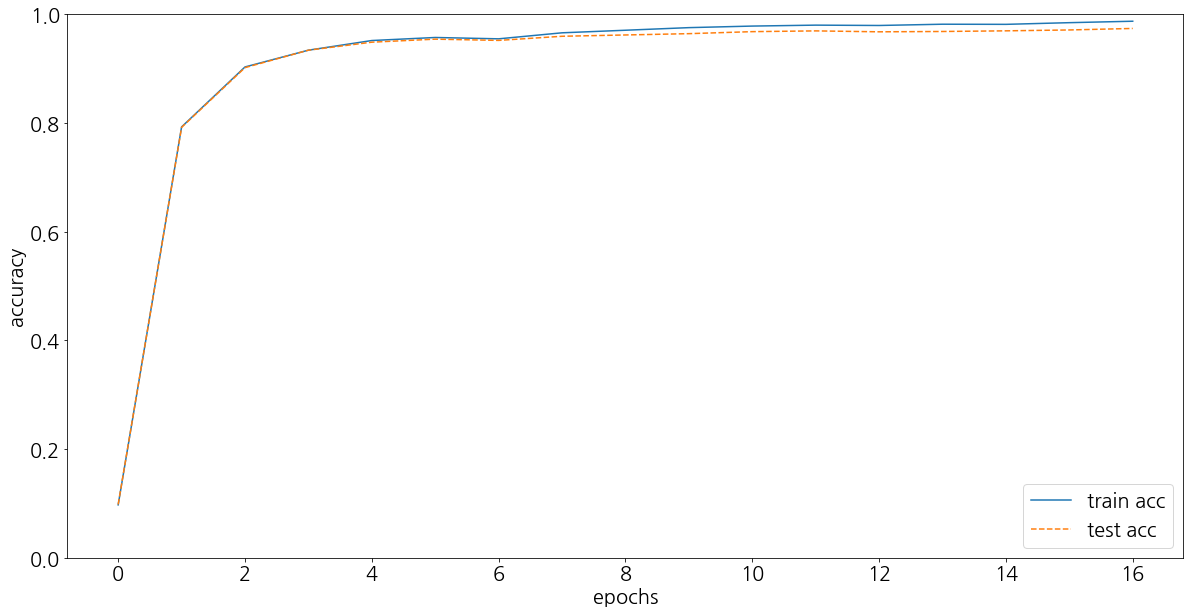

In [17]:
# coding: utf-8
import sys, os

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist

from common.optimizer import *

plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams.update({'font.size': 20})

class TwoLayerNet:

    def __init__(self, input_size, hidden_size1, hidden_size2, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size1)
        self.params['b1'] = np.zeros(hidden_size1)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size1, hidden_size2)
        self.params['b2'] = np.zeros(hidden_size2)
        self.params['W3'] = weight_init_std * np.random.randn(hidden_size2, output_size)
        self.params['b3'] = np.zeros(output_size)

        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine3'] = Affine(self.params['W3'], self.params['b3'])
        self.lastLayer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1: t = np.argmax(t, axis=1)
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # x : 입력 데이터, t : 정답 레이블

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        grads['W3'] = numerical_gradient(loss_W, self.params['W3'])
        grads['b3'] = numerical_gradient(loss_W, self.params['b3'])

        return grads

    def gradient(self, x, t):
        # forward
        self.loss(x, t)
        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        layers = list(self.layers.values())
        layers.reverse()

        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db
        grads['W3'], grads['b3'] = self.layers['Affine3'].dW, self.layers['Affine3'].db
        return grads

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
network = TwoLayerNet(input_size=784, hidden_size1=50, hidden_size2=100, output_size=10)

# 하이퍼파라미터

iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0] # 60000 개
batch_size = 100  # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수

iter_per_epoch = max(train_size / batch_size, 1)

optimizer = SGD()

for i in range(iters_num): # 10000
    # 미니배치 획득  # 랜덤으로 100개씩 뽑아서 10000번을 수행하니까 백만번
    batch_mask = np.random.choice(train_size, batch_size) # 100개 씩 뽑아서 10000번 백만번
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    params = network.params
    optimizer.update(params, grad)

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2', 'W3', 'b3'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss) # cost 가 점점 줄어드는것을 보려고

    # 1에폭당 정확도 계산 # 여기는 훈련이 아니라 1에폭 되었을때 정확도만 체크
    if i % iter_per_epoch == 0: # 600 번마다 정확도 쌓는다.

        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc) # 10000/600 개  16개 # 정확도가 점점 올라감
        test_acc_list.append(test_acc)  # 10000/600 개 16개 # 정확도가 점점 올라감
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### ※ 문제85. SGD의 단점을 극복한 경사하강법 momentum으로 mnist 신경망의 정확도를 구하시오
    SGD : train acc, test acc | 0.9870666666666666, 0.9738
    Mom : train acc, test acc | 0.9913666666666666, 0.9728

train acc, test acc | 0.11268333333333333, 0.1138
train acc, test acc | 0.8996, 0.8965
train acc, test acc | 0.9435166666666667, 0.9412
train acc, test acc | 0.9621333333333333, 0.957
train acc, test acc | 0.9695166666666667, 0.9637
train acc, test acc | 0.9732666666666666, 0.966
train acc, test acc | 0.9765666666666667, 0.9691
train acc, test acc | 0.979, 0.9704
train acc, test acc | 0.9824166666666667, 0.9695
train acc, test acc | 0.98455, 0.973
train acc, test acc | 0.9855, 0.9726
train acc, test acc | 0.9859833333333333, 0.9722
train acc, test acc | 0.9879, 0.9696
train acc, test acc | 0.9889166666666667, 0.9733
train acc, test acc | 0.9878666666666667, 0.9712
train acc, test acc | 0.98885, 0.9726
train acc, test acc | 0.9913666666666666, 0.9728


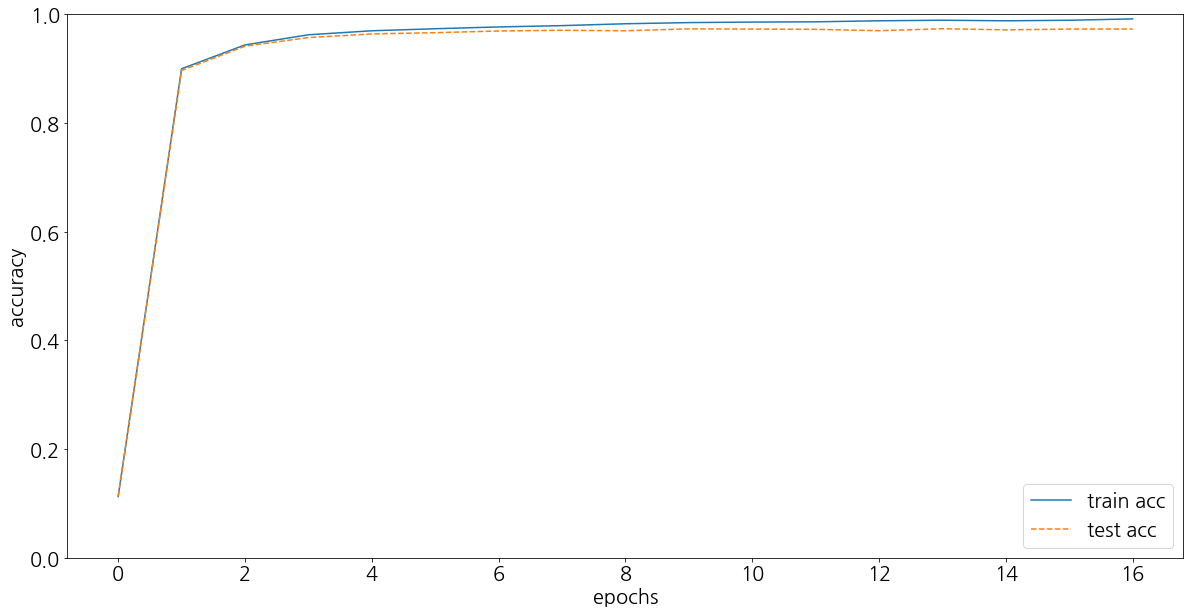

In [18]:
# coding: utf-8
import sys, os

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist

from common.optimizer import *

plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams.update({'font.size': 20})

class TwoLayerNet:

    def __init__(self, input_size, hidden_size1, hidden_size2, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size1)
        self.params['b1'] = np.zeros(hidden_size1)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size1, hidden_size2)
        self.params['b2'] = np.zeros(hidden_size2)
        self.params['W3'] = weight_init_std * np.random.randn(hidden_size2, output_size)
        self.params['b3'] = np.zeros(output_size)

        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine3'] = Affine(self.params['W3'], self.params['b3'])
        self.lastLayer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1: t = np.argmax(t, axis=1)
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # x : 입력 데이터, t : 정답 레이블

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        grads['W3'] = numerical_gradient(loss_W, self.params['W3'])
        grads['b3'] = numerical_gradient(loss_W, self.params['b3'])

        return grads

    def gradient(self, x, t):
        # forward
        self.loss(x, t)
        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        layers = list(self.layers.values())
        layers.reverse()

        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db
        grads['W3'], grads['b3'] = self.layers['Affine3'].dW, self.layers['Affine3'].db
        return grads

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
network = TwoLayerNet(input_size=784, hidden_size1=50, hidden_size2=100, output_size=10)

# 하이퍼파라미터

iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0] # 60000 개
batch_size = 100  # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수

iter_per_epoch = max(train_size / batch_size, 1)

optimizer = Momentum()

for i in range(iters_num): # 10000
    # 미니배치 획득  # 랜덤으로 100개씩 뽑아서 10000번을 수행하니까 백만번
    batch_mask = np.random.choice(train_size, batch_size) # 100개 씩 뽑아서 10000번 백만번
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    params = network.params
    optimizer.update(params, grad)

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2', 'W3', 'b3'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss) # cost 가 점점 줄어드는것을 보려고

    # 1에폭당 정확도 계산 # 여기는 훈련이 아니라 1에폭 되었을때 정확도만 체크
    if i % iter_per_epoch == 0: # 600 번마다 정확도 쌓는다.

        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc) # 10000/600 개  16개 # 정확도가 점점 올라감
        test_acc_list.append(test_acc)  # 10000/600 개 16개 # 정확도가 점점 올라감
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### ※ 문제86. Adagrade 경사하강법으로 구현하시오
    SGD      : train acc, test acc | 0.9870666666666666, 0.9738
    Momentum : train acc, test acc | 0.9913666666666666, 0.9728
    Adagrade : train acc, test acc | 0.9893166666666666, 0.9725

train acc, test acc | 0.11896666666666667, 0.1192
train acc, test acc | 0.924, 0.9233
train acc, test acc | 0.9516333333333333, 0.9473
train acc, test acc | 0.9613333333333334, 0.9569
train acc, test acc | 0.9679666666666666, 0.9631
train acc, test acc | 0.9709, 0.9608
train acc, test acc | 0.9704166666666667, 0.9629
train acc, test acc | 0.9774166666666667, 0.9677
train acc, test acc | 0.97955, 0.9692
train acc, test acc | 0.9765666666666667, 0.9667
train acc, test acc | 0.9829333333333333, 0.9724
train acc, test acc | 0.9826166666666667, 0.9703
train acc, test acc | 0.98615, 0.9719
train acc, test acc | 0.98665, 0.9723
train acc, test acc | 0.98715, 0.971
train acc, test acc | 0.9893, 0.9738
train acc, test acc | 0.9893166666666666, 0.9725


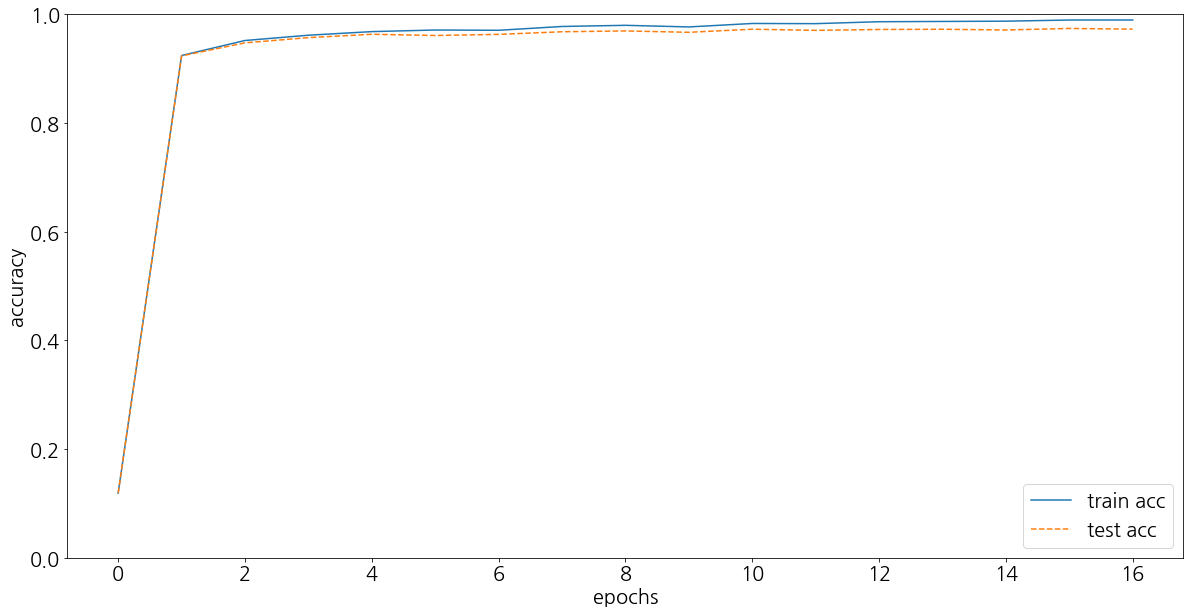

In [19]:
# coding: utf-8
import sys, os

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist

from common.optimizer import *

plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams.update({'font.size': 20})

class TwoLayerNet:

    def __init__(self, input_size, hidden_size1, hidden_size2, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size1)
        self.params['b1'] = np.zeros(hidden_size1)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size1, hidden_size2)
        self.params['b2'] = np.zeros(hidden_size2)
        self.params['W3'] = weight_init_std * np.random.randn(hidden_size2, output_size)
        self.params['b3'] = np.zeros(output_size)

        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine3'] = Affine(self.params['W3'], self.params['b3'])
        self.lastLayer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1: t = np.argmax(t, axis=1)
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # x : 입력 데이터, t : 정답 레이블

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        grads['W3'] = numerical_gradient(loss_W, self.params['W3'])
        grads['b3'] = numerical_gradient(loss_W, self.params['b3'])

        return grads

    def gradient(self, x, t):
        # forward
        self.loss(x, t)
        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        layers = list(self.layers.values())
        layers.reverse()

        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db
        grads['W3'], grads['b3'] = self.layers['Affine3'].dW, self.layers['Affine3'].db
        return grads

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
network = TwoLayerNet(input_size=784, hidden_size1=50, hidden_size2=100, output_size=10)

# 하이퍼파라미터

iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0] # 60000 개
batch_size = 100  # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수

iter_per_epoch = max(train_size / batch_size, 1)

optimizer = AdaGrad()

for i in range(iters_num): # 10000
    # 미니배치 획득  # 랜덤으로 100개씩 뽑아서 10000번을 수행하니까 백만번
    batch_mask = np.random.choice(train_size, batch_size) # 100개 씩 뽑아서 10000번 백만번
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    params = network.params
    optimizer.update(params, grad)

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2', 'W3', 'b3'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss) # cost 가 점점 줄어드는것을 보려고

    # 1에폭당 정확도 계산 # 여기는 훈련이 아니라 1에폭 되었을때 정확도만 체크
    if i % iter_per_epoch == 0: # 600 번마다 정확도 쌓는다.

        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc) # 10000/600 개  16개 # 정확도가 점점 올라감
        test_acc_list.append(test_acc)  # 10000/600 개 16개 # 정확도가 점점 올라감
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### ※ 문제87. Adam 옵티마이저로 구현하시오
    SGD      : train acc, test acc | 0.9870666666666666, 0.9738
    Momentum : train acc, test acc | 0.9913666666666666, 0.9728
    Adagrade : train acc, test acc | 0.9893166666666666, 0.9725
    Adam     : train acc, test acc | 0.9948833333333333, 0.9738

train acc, test acc | 0.19035, 0.1927
train acc, test acc | 0.9271333333333334, 0.9275
train acc, test acc | 0.95945, 0.954
train acc, test acc | 0.96955, 0.96
train acc, test acc | 0.9750833333333333, 0.9654
train acc, test acc | 0.97855, 0.9631
train acc, test acc | 0.9834833333333334, 0.9687
train acc, test acc | 0.9833166666666666, 0.9649
train acc, test acc | 0.9854833333333334, 0.9687
train acc, test acc | 0.98765, 0.9706
train acc, test acc | 0.9890166666666667, 0.9721
train acc, test acc | 0.9917, 0.9721
train acc, test acc | 0.9908666666666667, 0.9707
train acc, test acc | 0.9929666666666667, 0.9733
train acc, test acc | 0.9933, 0.9726
train acc, test acc | 0.99265, 0.9717
train acc, test acc | 0.9948833333333333, 0.9738


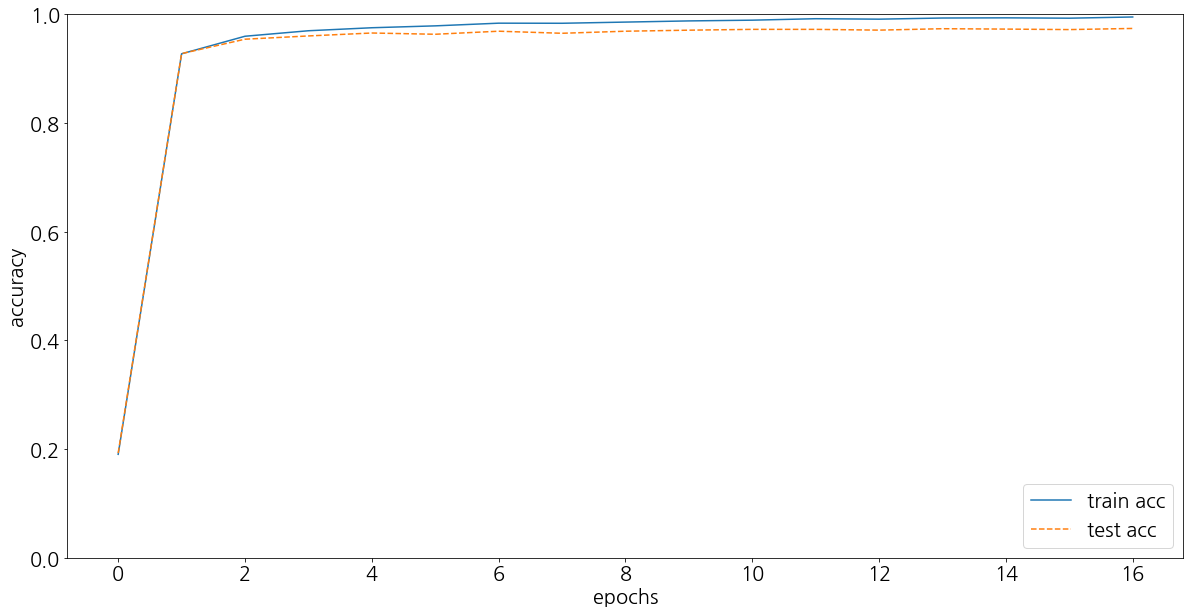

In [20]:
# coding: utf-8
import sys, os

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist

from common.optimizer import *

plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams.update({'font.size': 20})

class TwoLayerNet:

    def __init__(self, input_size, hidden_size1, hidden_size2, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size1)
        self.params['b1'] = np.zeros(hidden_size1)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size1, hidden_size2)
        self.params['b2'] = np.zeros(hidden_size2)
        self.params['W3'] = weight_init_std * np.random.randn(hidden_size2, output_size)
        self.params['b3'] = np.zeros(output_size)

        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine3'] = Affine(self.params['W3'], self.params['b3'])
        self.lastLayer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1: t = np.argmax(t, axis=1)
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # x : 입력 데이터, t : 정답 레이블

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        grads['W3'] = numerical_gradient(loss_W, self.params['W3'])
        grads['b3'] = numerical_gradient(loss_W, self.params['b3'])

        return grads

    def gradient(self, x, t):
        # forward
        self.loss(x, t)
        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        layers = list(self.layers.values())
        layers.reverse()

        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db
        grads['W3'], grads['b3'] = self.layers['Affine3'].dW, self.layers['Affine3'].db
        return grads

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
network = TwoLayerNet(input_size=784, hidden_size1=50, hidden_size2=100, output_size=10)

# 하이퍼파라미터

iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0] # 60000 개
batch_size = 100  # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수

iter_per_epoch = max(train_size / batch_size, 1)

optimizer = Adam()

for i in range(iters_num): # 10000
    # 미니배치 획득  # 랜덤으로 100개씩 뽑아서 10000번을 수행하니까 백만번
    batch_mask = np.random.choice(train_size, batch_size) # 100개 씩 뽑아서 10000번 백만번
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    params = network.params
    optimizer.update(params, grad)

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2', 'W3', 'b3'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss) # cost 가 점점 줄어드는것을 보려고

    # 1에폭당 정확도 계산 # 여기는 훈련이 아니라 1에폭 되었을때 정확도만 체크
    if i % iter_per_epoch == 0: # 600 번마다 정확도 쌓는다.

        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc) # 10000/600 개  16개 # 정확도가 점점 올라감
        test_acc_list.append(test_acc)  # 10000/600 개 16개 # 정확도가 점점 올라감
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### ※ 문제88. Adam으로 만든 99%의 정확도인 신경망의 가중치를 pickle 파일로 내리시오

In [27]:
# coding: utf-8
import sys, os

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist

from common.optimizer import *

plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams.update({'font.size': 20})

class TwoLayerNet:

    def __init__(self, input_size, hidden_size1, hidden_size2, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size1)
        self.params['b1'] = np.zeros(hidden_size1)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size1, hidden_size2)
        self.params['b2'] = np.zeros(hidden_size2)
        self.params['W3'] = weight_init_std * np.random.randn(hidden_size2, output_size)
        self.params['b3'] = np.zeros(output_size)

        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine3'] = Affine(self.params['W3'], self.params['b3'])
        self.lastLayer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1: t = np.argmax(t, axis=1)
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # x : 입력 데이터, t : 정답 레이블

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        grads['W3'] = numerical_gradient(loss_W, self.params['W3'])
        grads['b3'] = numerical_gradient(loss_W, self.params['b3'])

        return grads

    def gradient(self, x, t):
        # forward
        self.loss(x, t)
        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        layers = list(self.layers.values())
        layers.reverse()

        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db
        grads['W3'], grads['b3'] = self.layers['Affine3'].dW, self.layers['Affine3'].db
        return grads

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
network = TwoLayerNet(input_size=784, hidden_size1=50, hidden_size2=100, output_size=10)

# 하이퍼파라미터

iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0] # 60000 개
batch_size = 100  # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수

iter_per_epoch = max(train_size / batch_size, 1)

optimizer = Adam()

for i in range(iters_num): # 10000
    # 미니배치 획득  # 랜덤으로 100개씩 뽑아서 10000번을 수행하니까 백만번
    batch_mask = np.random.choice(train_size, batch_size) # 100개 씩 뽑아서 10000번 백만번
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    params = network.params
    optimizer.update(params, grad)

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2', 'W3', 'b3'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss) # cost 가 점점 줄어드는것을 보려고

    # 1에폭당 정확도 계산 # 여기는 훈련이 아니라 1에폭 되었을때 정확도만 체크
    if i % iter_per_epoch == 0: # 600 번마다 정확도 쌓는다.

        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc) # 10000/600 개  16개 # 정확도가 점점 올라감
        test_acc_list.append(test_acc)  # 10000/600 개 16개 # 정확도가 점점 올라감
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

import pickle
with open('d:/dl/mnist_adam.pkl','wb') as f:
    pickle.dump(network.params, f)

train acc, test acc | 0.09751666666666667, 0.0974
train acc, test acc | 0.9246166666666666, 0.9204
train acc, test acc | 0.9583166666666667, 0.9529
train acc, test acc | 0.9685833333333334, 0.9646
train acc, test acc | 0.9760833333333333, 0.9673
train acc, test acc | 0.97855, 0.9683
train acc, test acc | 0.9827166666666667, 0.9699
train acc, test acc | 0.9842, 0.9711
train acc, test acc | 0.9855666666666667, 0.9716
train acc, test acc | 0.9886166666666667, 0.9714
train acc, test acc | 0.9896333333333334, 0.9737
train acc, test acc | 0.9893, 0.9718
train acc, test acc | 0.9911, 0.9726
train acc, test acc | 0.9935833333333334, 0.9747
train acc, test acc | 0.9952166666666666, 0.9735
train acc, test acc | 0.9934166666666666, 0.9733
train acc, test acc | 0.9945, 0.9739


### ※ 문제89. 학습된 가중치를 불러와서 필기체 숫자 하나를 컴퓨터가 맞추는지 코드를 구현하시오
    학습X, 3장에서 코드 불러오기

In [41]:
import  sys, os
import  pickle
sys.path.append(os.pardir)
from dataset.mnist  import  load_mnist 
from  common.functions  import  sigmoid, softmax, np

def  get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return  x_test, t_test

def  init_network():
    with  open("d:/dl/mnist_adam.pkl","rb")  as  f:
        network = pickle.load(f)
    return  network

def  predict( network, x ):
    W1, W2, W3 = network["W1"], network["W2"], network["W3"]
    b1, b2, b3 = network["b1"], network["b2"], network["b3"]
    a1 = np.dot( x, W1) + b1
    z1 = relu(a1)
    #2층
    a2 = np.dot(z1, W2) + b2
    z2 = relu(a2)
    
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

x, t = get_data()  #  테스트 데이터 10000 장을 라벨과 같이 불러옴 
network = init_network()
y = predict( network, x[0] )  # 테스트 데이터의 첫번째 이미지를 예측
print ( t[0] ) # 7 
print ( np.argmax(y) ) # 예측값이 소프트 맥스 함수 통과한 결과인 확률 백터로 출력된다. 

7
7


### ※ 문제90. 100장을 한번에 넣어서 100장 중에 몇개나 맞추는지 확인하시오

In [42]:
import  sys, os
import  pickle
sys.path.append(os.pardir)
from dataset.mnist  import  load_mnist 
from  common.functions  import  sigmoid, softmax, np

def  get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return  x_test, t_test

def  init_network():
    with  open("d:/dl/mnist_adam.pkl","rb")  as  f:
        network = pickle.load(f)
    return  network

def  predict( network, x ):
    W1, W2, W3 = network["W1"], network["W2"], network["W3"]
    b1, b2, b3 = network["b1"], network["b2"], network["b3"]

    a1 = np.dot( x, W1) + b1
    z1 = relu(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = relu(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

x, t = get_data()  #  테스트 데이터 10000 장을 라벨과 같이 불러옴 
network = init_network()
y = predict( network, x[:100] )  # 테스트 데이터의 첫번째 이미지를 예측

print ( t[:100] ) # 7 
print ( np.argmax(y) )
print('accuracy = ',sum(np.argmax(y,axis=1)==t[:100])/100)

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]
683
accuracy =  0.98


### <b>■ underfitting 방지법</b>
    1. 고급 경사하강법
    2. 가중치 초기값 선정
    3. 배치 정규화
    
### <b>□ 가중치 초기값 선정(p.202)</b>
    랜덤으로 생성되는 가중치 W의 초기값을 어떻게 선정하느냐에 따라 학습이 잘 될 수도 있고 안될 수도 있다.
    학습이 잘되려면 가중치 초기값들의 분포가 정규분포 형태를 이루어야한다.
    np.random.randn은 가우시간 정규분포를 따르는 난수를 생성
    
    1. 생성되는 가중치의 표준편차가 큰 경우
        시험문제가 너무 어려우면 아주 잘하는 학생들과 아주 못하는 학생들로 점수가 나뉜다.
        구현 예 : 1 * np.random.randn(784, 50) 
![big_std](http://cfile269.uf.daum.net/image/992A64445F3054D50652BF)

    2. 생성되는 가중치의 표준편차가 작은 경우
        시험문제가 너무 쉬우면 학생들 점수가 평균에 가깝다.
        구현 예 : 0.01 * np.random.randn(784, 50) 
![small_std](http://cfile248.uf.daum.net/image/992003445F3054D50858C8)

    다른 표준편차를 지정하는 방법 2가지
        1. Xavier(자비에르) 초기값 선정 -> sigmoid 함수와 짝
        2. He 초기값 선정 -> ReLU와 짝

#### 예제. Adam Optimizer로 구현한 2층 신경망의 가중치 초기값을 Xavier로 지정하고 학습시키시오
$$ {{1} \over {\sqrt n}} \times {\rm np.random.randn(\rm {input\_size, hidden\_size})} \\\\ {{1} \over {\sqrt n}} : 앞\, 계층의\, 노드의\, 개수$$

In [ ]:
class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size):        
        self.params = {}
        self.params['W1'] = np.random.randn(input_size, hidden_size) / (np.sqrt(input_size))
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = np.random.randn(hidden_size, output_size) / (np.sqrt(hidden_size))
        self.params['b2'] = np.zeros(output_size)
        
        

In [43]:
# coding: utf-8
import sys, os

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist

from common.optimizer import *

plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams.update({'font.size': 20})

class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size):        
        self.params = {}
        self.params['W1'] = np.random.randn(input_size, hidden_size) / (np.sqrt(input_size))
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = np.random.randn(hidden_size, output_size) / (np.sqrt(hidden_size))
        self.params['b2'] = np.zeros(output_size)
        
        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
        self.lastLayer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1: t = np.argmax(t, axis=1)
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # x : 입력 데이터, t : 정답 레이블

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

    def gradient(self, x, t):
        # forward
        self.loss(x, t)
        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        layers = list(self.layers.values())
        layers.reverse()

        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db
        return grads

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터

iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0] # 60000 개
batch_size = 100  # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수

iter_per_epoch = max(train_size / batch_size, 1)

optimizer = Adam()

for i in range(iters_num): # 10000
    # 미니배치 획득  # 랜덤으로 100개씩 뽑아서 10000번을 수행하니까 백만번
    batch_mask = np.random.choice(train_size, batch_size) # 100개 씩 뽑아서 10000번 백만번
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    params = network.params
    optimizer.update(params, grad)

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss) # cost 가 점점 줄어드는것을 보려고

    # 1에폭당 정확도 계산 # 여기는 훈련이 아니라 1에폭 되었을때 정확도만 체크
    if i % iter_per_epoch == 0: # 600 번마다 정확도 쌓는다.

        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc) # 10000/600 개  16개 # 정확도가 점점 올라감
        test_acc_list.append(test_acc)  # 10000/600 개 16개 # 정확도가 점점 올라감
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

train acc, test acc | 0.23473333333333332, 0.2297
train acc, test acc | 0.9394333333333333, 0.9362
train acc, test acc | 0.95965, 0.956
train acc, test acc | 0.96645, 0.9608
train acc, test acc | 0.97285, 0.965
train acc, test acc | 0.9764, 0.9686
train acc, test acc | 0.9804666666666667, 0.9694
train acc, test acc | 0.9822666666666666, 0.9711
train acc, test acc | 0.9824333333333334, 0.9699
train acc, test acc | 0.98485, 0.9718
train acc, test acc | 0.9871166666666666, 0.9722
train acc, test acc | 0.9889166666666667, 0.9728
train acc, test acc | 0.9889666666666667, 0.9729
train acc, test acc | 0.9897333333333334, 0.9742
train acc, test acc | 0.9918166666666667, 0.9751
train acc, test acc | 0.9918333333333333, 0.974
train acc, test acc | 0.9932166666666666, 0.9734


### ※ 문제91. 이번에는 가중치 초기화 값을 He로 구현하시오
$$ \sqrt{{2}\over {n}} \times \rm np.random.randn(input\_size, hidden\_size) $$

In [45]:
# coding: utf-8
import sys, os

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist

from common.optimizer import *

plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams.update({'font.size': 20})

class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size):        
        self.params = {}
        self.params['W1'] = np.random.randn(input_size, hidden_size) / (np.sqrt(input_size/2))
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = np.random.randn(hidden_size, output_size) / (np.sqrt(hidden_size/2))
        self.params['b2'] = np.zeros(output_size)
        
        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
        self.lastLayer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1: t = np.argmax(t, axis=1)
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # x : 입력 데이터, t : 정답 레이블

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

    def gradient(self, x, t):
        # forward
        self.loss(x, t)
        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        layers = list(self.layers.values())
        layers.reverse()

        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db
        return grads

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터

iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0] # 60000 개
batch_size = 100  # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수

iter_per_epoch = max(train_size / batch_size, 1)

optimizer = Adam()

for i in range(iters_num): # 10000
    # 미니배치 획득  # 랜덤으로 100개씩 뽑아서 10000번을 수행하니까 백만번
    batch_mask = np.random.choice(train_size, batch_size) # 100개 씩 뽑아서 10000번 백만번
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    params = network.params
    optimizer.update(params, grad)

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss) # cost 가 점점 줄어드는것을 보려고

    # 1에폭당 정확도 계산 # 여기는 훈련이 아니라 1에폭 되었을때 정확도만 체크
    if i % iter_per_epoch == 0: # 600 번마다 정확도 쌓는다.

        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc) # 10000/600 개  16개 # 정확도가 점점 올라감
        test_acc_list.append(test_acc)  # 10000/600 개 16개 # 정확도가 점점 올라감
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

train acc, test acc | 0.17175, 0.1694
train acc, test acc | 0.9444833333333333, 0.942
train acc, test acc | 0.9588333333333333, 0.9567
train acc, test acc | 0.9675666666666667, 0.9614
train acc, test acc | 0.97305, 0.9634
train acc, test acc | 0.97665, 0.9669
train acc, test acc | 0.97825, 0.9685
train acc, test acc | 0.9819333333333333, 0.9706
train acc, test acc | 0.9831, 0.9723
train acc, test acc | 0.9865, 0.9735
train acc, test acc | 0.9881833333333333, 0.9733
train acc, test acc | 0.9887166666666667, 0.9696
train acc, test acc | 0.9899, 0.9713
train acc, test acc | 0.9913166666666666, 0.9727
train acc, test acc | 0.9913166666666666, 0.9712
train acc, test acc | 0.9929833333333333, 0.9724
train acc, test acc | 0.99145, 0.9725
